In [25]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
%matplotlib inline

import random
import pandas as pd
import numpy as np

import pickle

In [26]:
mrcas = {
            'DENV1': 2970,
            'DENV2': 617, 
            'DENV3': 2152,
            'DENV4':1}

mrcas['DENV1_I'] = 4128
mrcas['DENV1_II'] = 3679
mrcas['DENV1_IV'] = 3687
mrcas['DENV1_V'] = 2975

mrcas['DENV3_I'] = 2333
mrcas['DENV3_II'] = [2215, 2205, 2195, 2180, 2165, 2172, 2155]
mrcas['DENV3_III'] = 2504
mrcas['DENV3_V'] = 2322

mrcas['DENV4_SYLVATIC'] = 2 
mrcas['DENV4_I'] = 34
mrcas['DENV4_II'] = 163
mrcas['DENV4_III'] = 6

mrcas['DENV2_AMERICAN'] = 631
mrcas['DENV2_ASIANII'] = 1368
mrcas['DENV2_COSMOPOLITAN'] = 739
mrcas['DENV2_ASIANI'] = 1423
mrcas['DENV2_SYLVATIC'] = 618
mrcas['DENV2_ASIANAMERICAN'] = 1637

clade_name = {}
for name, clades in mrcas.items():
    if type(clades)==int:
        clade_name[clades] = name
    else:
        clade_name.update({ clade: name for clade in clades})
pickle.dump(clade_name, open('./names.p', 'wb'))

In [28]:
colors = { 
'cmap': 'magma_r',
'denv1': '#AA4488',
'denv2': '#4477AA',
'denv3': '#44AA77',
'denv4': '#AAAA44',
    
'all_effects': '#DD7788',
'interserotype_effects': '#44AAAA'
}

genotypes = { s : [ g for g in clade_name.values() if g.startswith(s) and len(g) > 5] for s in ['DENV1', 'DENV2', 'DENV3', 'DENV4'] }

for serotype, genotypes in genotypes.items():
    start_color = colors[serotype.lower()]
    color_list = sns.light_palette(start_color, n_colors=len(genotypes)+4)[2:-2]
    
#     colors['%s_ramp'%serotype.lower()] = palette
    for gt, c in zip(sorted(genotypes), color_list):
        colors[gt] = c

pickle.dump(colors, open('./colors.p', 'wb'))

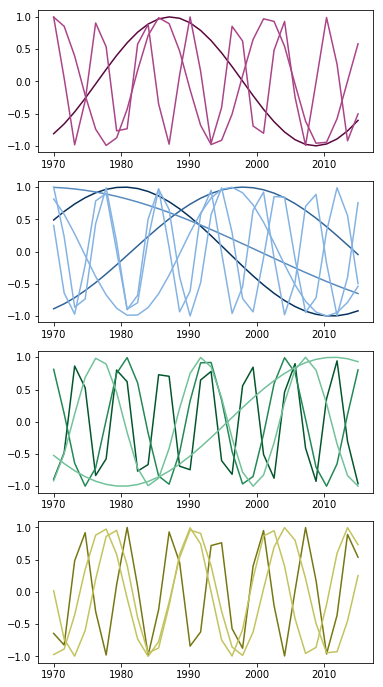

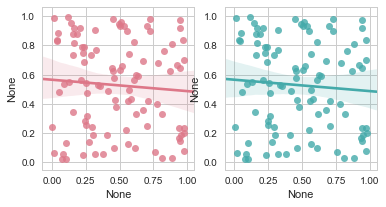

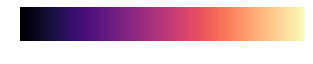

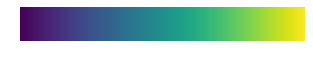

In [3]:
## Demo serotype colors
fig, axes = plt.subplots(4,1, figsize=(6,12))
for serotype, ax in zip(['denv1_ramp', 'denv2_ramp', 'denv3_ramp', 'denv4_ramp'], axes.flatten()):
    cmap = colors[serotype]
    for i in range(n_genotypes[serotype]):
        x = pd.Series(np.linspace(1970, 2015, 30))
        factor=random.random()
        y = pd.Series([np.sin(xi*factor) for xi in x])
        ax.plot(x,y,c=cmap(1./(i+1.)))

plt.show()

## Demo all-effects vs. interserotype-effects colors
x = pd.Series([random.random() for x in range(100)])
y = pd.Series([random.random() for y in range(100)])

sns.set(style='whitegrid')

fig, axes = plt.subplots(1,2, figsize=(6,3))
sns.regplot(x,y,color=colors['all_effects'], ax=axes[0])
sns.regplot(x,y, color=colors['interserotype_effects'], ax=axes[1])
plt.show()


## Demo titer cmap
fig, ax = plt.subplots(1, figsize=(5,0.5))
fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap('magma'))
ax.set_axis_off()
plt.show()


fig, ax = plt.subplots(1, figsize=(5,0.5))
fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(colors['cmap']))
ax.set_axis_off()
plt.show()

